In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

In [ ]:
url = 'https://raw.githubusercontent.com/yetanotherpassword/COMS4507/main/BTC-USD.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,22896.799303,23326.989012,22418.283742,22863.874013,22863.874013,2.894740e+10
std,5333.237681,5443.699592,5141.466377,5266.540373,5266.540373,1.300788e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,7.714767e+09
25%,19326.514648,19636.722168,19025.690430,19325.394043,19325.394043,2.040077e+10
50%,21528.958985,21803.812500,20959.862305,21531.104492,21531.104492,2.716019e+10
75%,24738.201172,25228.042969,24302.009765,24719.875000,24719.875000,3.392006e+10
max,40448.421875,40713.890625,39352.203125,40458.308594,40458.308594,1.189925e+11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

DATA VISUALISATION

In [ ]:
#Reducing the dataframe to just the Close price
bitcoin_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})

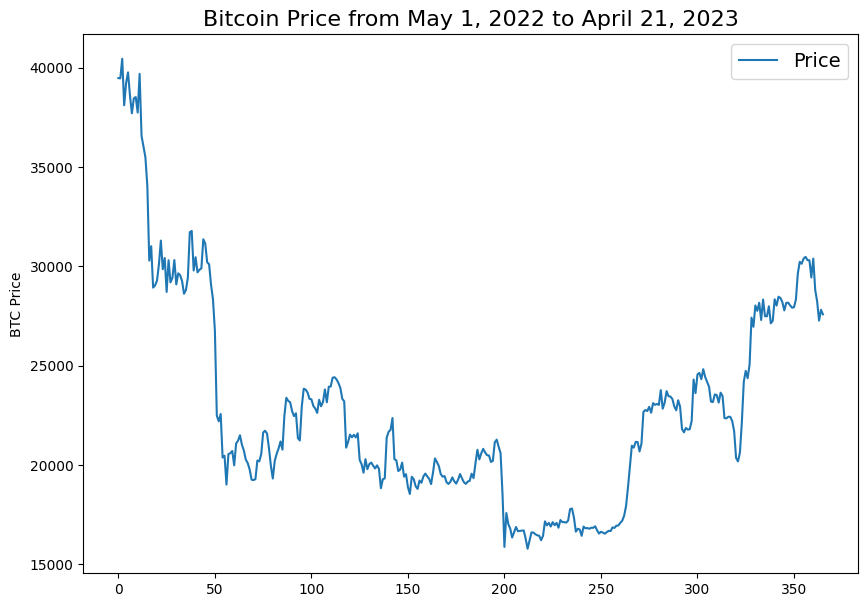

In [ ]:
#Visualising the Close Prices for Bitcoin for the Dataset
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Bitcoin Price from May 1, 2022 to April 21, 2023", fontsize=16)
plt.legend(fontsize=14

In [ ]:
#Convert the dataframe to numpy array
dataset = bitcoin_prices.values

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
# math.ceil will round up the number
training_data_len = math.ceil(len(dataset) * .8) # We are using %80 of the data for training
training_data_len

293

In [ ]:
# Create the training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into X_train and y_train data sets
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])


  if i <= 60:
    print(X_train)
    print(y_train)
    print()

[array([0.96061865, 0.95991185, 1.        , 0.90511753, 0.95066328,
       0.97225569, 0.92507468, 0.88879936, 0.9193704 , 0.9218119 ,
       0.89024147, 0.96919716, 0.84260208, 0.82094839, 0.79910216,
       0.74062516, 0.58812592, 0.61755125, 0.5329763 , 0.53749158,
       0.54703117, 0.58019404, 0.62899006, 0.57053301, 0.59335085,
       0.52421768, 0.58883043, 0.54369271, 0.55307563, 0.58921098,
       0.53956519, 0.56212914, 0.55835043, 0.54638754, 0.52046035,
       0.52805331, 0.55363217, 0.64606585, 0.64873781, 0.56794544,
       0.59503829, 0.56410736, 0.56931685, 0.57230611, 0.63164737,
       0.62292486, 0.58477796, 0.58062907, 0.53895291, 0.50964752,
       0.44486861, 0.27157788, 0.26020439, 0.2750415 , 0.18622519,
       0.18986639, 0.13093734, 0.19318157, 0.19505688, 0.19955853])]
[0.17022986344323754]



In [ ]:
len(X_train)

233

In [ ]:
# Convert the X_train and y_train to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape
     

(233, 60)

In [ ]:
# Reshape the data because LSTM needs 3 dim
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # we make it like pros. it wanna say "np.reshape(X_train, (2083, 60, 1))"
X_train.shape
     

(233, 60, 1)

In [ ]:
# Create the testing dataset
# Create a new array containing scaled values from index 2083
test_data = scaled_data[training_data_len - 60 : , :]

#Create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60 : i, 0])


In [ ]:
# Convert the data to a numpy array 
X_test = np.array(X_test)
     

In [ ]:
# Reshape the test data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
     

In [ ]:
# Build LSTM model
tf.random.set_seed(42)

model_1 = Sequential()
model_1.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # we made it like pros ;) , the simple form is "input_shape(60, 1)""
model_1.add(LSTM(50, return_sequences=False))
model_1.add(Dense(25))
model_1.add(Dense(1))

In [ ]:
# Compile the model
model_1.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model_1.fit(X_train, y_train, batch_size=1, epochs=10)
     

Epoch 1/10
233/233 [==============================] - 17s 35ms/step - loss: 0.0033
Epoch 2/10
233/233 [==============================] - 14s 59ms/step - loss: 0.0021
Epoch 3/10
233/233 [==============================] - 10s 41ms/step - loss: 0.0016
Epoch 4/10
233/233 [==============================] - 8s 35ms/step - loss: 0.0013
Epoch 5/10
233/233 [==============================] - 7s 30ms/step - loss: 0.0014
Epoch 6/10
233/233 [==============================] - 8s 35ms/step - loss: 0.0010
Epoch 7/10
233/233 [==============================] - 8s 34ms/step - loss: 0.0011
Epoch 8/10
233/233 [==============================] - 8s 33ms/step - loss: 9.3555e-04
Epoch 9/10
233/233 [==============================] - 8s 35ms/step - loss: 7.2652e-04
Epoch 10/10
233/233 [==============================] - 7s 30ms/step - loss: 6.9707e-04


In [ ]:
# Get the model_1 predicted price values 
predictions_1 = model_1.predict(X_test)
predictions_1 = scaler.inverse_transform(predictions_1)
len(predictions_1)

3/3 [==============================] - 1s 17ms/step


73

In [ ]:
# Get the root mean squared error (RMSE) for model_1
rmse = np.sqrt(np.mean(predictions_1 - y_test)**2)
rmse

392.89220349486294

Text(0.5, 0, 'epochs')

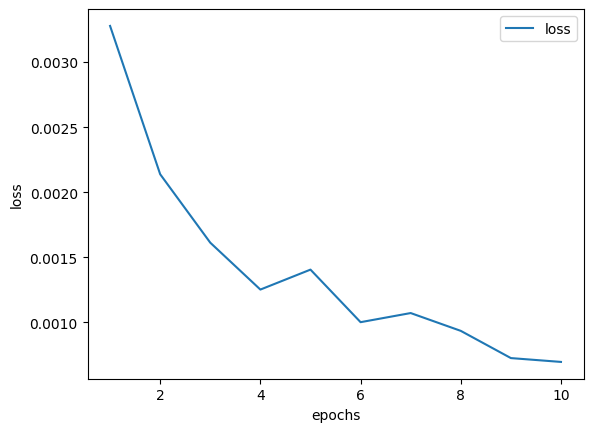

In [ ]:

# Let's plot the history of model_1 and see what's going on
historyForPlot = pd.DataFrame(history.history)
historyForPlot.index += 1 # we plus 1 to the number of indexing so our epochs Plot picture will be counting from 1 not 0.
historyForPlot.plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Train the model again with 7 epochs
# but first we need to create another model so we can compare them together

# building LSTM model_2
tf.random.set_seed(42)

model_2 = Sequential()
model_2.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # we made it like pros ;) | the simple form is "input_shape(60, 1)
model_2.add(LSTM(50, return_sequences=False))
model_2.add(Dense(25))
model_2.add(Dense(1))

# Compile model_2
model_2.compile(optimizer='Adam', loss='mse')

# Fit model_2
history_2 = model_2.fit(X_train, y_train, batch_size=1, epochs=6)
     


Epoch 1/6
233/233 [==============================] - 12s 37ms/step - loss: 0.0034
Epoch 2/6
233/233 [==============================] - 14s 61ms/step - loss: 0.0021
Epoch 3/6
233/233 [==============================] - 10s 43ms/step - loss: 0.0016
Epoch 4/6
233/233 [==============================] - 7s 30ms/step - loss: 0.0012
Epoch 5/6
233/233 [==============================] - 8s 35ms/step - loss: 0.0014
Epoch 6/6
233/233 [==============================] - 11s 46ms/step - loss: 9.6169e-04


In [ ]:
# Get the model_2 predicted price values 
predictions_2 = model_2.predict(X_test)
predictions_2 = scaler.inverse_transform(predictions_2)
len(predictions_2)
     

3/3 [==============================] - 1s 16ms/step


73

In [ ]:
# Get the root mean squared error (RMSE) for model_2
rmse_2 = np.sqrt(np.mean(predictions_2 - y_test)**2)
rmse_2

1127.795323260274

<ipython-input-38-616df483b1be>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_1['Predictions'] = predictions_1
<ipython-input-38-616df483b1be>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_2['Predictions'] = predictions_2


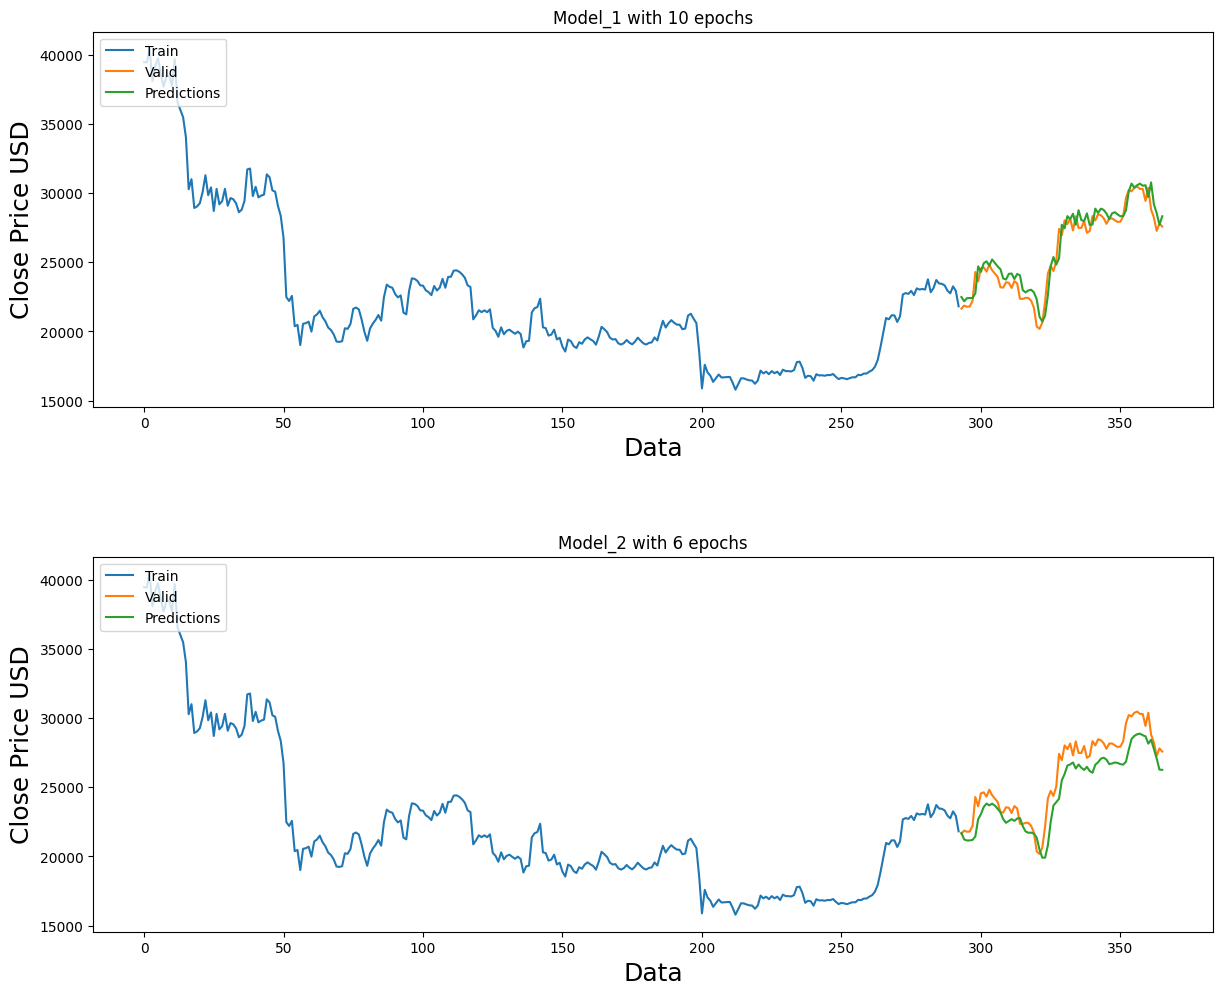

In [ ]:
# Plot the data
train = df[:training_data_len]

#data for model_1
valid_1 = df[training_data_len:]
valid_1['Predictions'] = predictions_1

# data for model_2
valid_2 = df[training_data_len:]
valid_2['Predictions'] = predictions_2

# Visualized the data 
#model_1
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('Model_1 with 10 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_1[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

#model_2
plt.subplot(2, 1, 2)
plt.title('Model_2 with 6 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_2[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [ ]:
#Get the last 60 day closing price values and convert the datadrame to an array
last_60_days = dataset[-60:]
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.fit_transform(last_60_days)
# create an empty list
new_X_test = []
# Append the past 60 days
new_X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
new_X_test = np.array(new_X_test)
# Reshape the data 
new_X_test = np.reshape(new_X_test, (new_X_test.shape[0], new_X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model_1.predict(new_X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 468ms/step
[[27835.508]]
